---
title: "Maximum Likelihood Estimation"
permalink: /references/mle/
last_modified_at: 2022-01-01
classes: wide
toc: true
---

본 게시물은 Rice University의 Richard W. Evans가 2018년 7월 QuantEcon에 게시한 [Maximum Likelihood Estimation](https://notes.quantecon.org/submission/5b3b102eb9eab00015b89f8e)를 바탕으로 만들어졌습니다.

# General Characterization of a Model and Data Generating Process

후술될 MLE, GMM, SMM

In [5]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import requests

import matplotlib.pyplot as plt

In [3]:
# Econ381totpts.txt 데이터 불러오기
url = ('https://raw.githubusercontent.com/rickecon/Notebooks/' +
       'master/MLE/data/Econ381totpts.txt')
data_file = requests.get(url, allow_redirects=True)
open('Econ381totpts.txt', 'wb').write(data_file.content)

# Load the data as a NumPy array
pts = np.loadtxt('Econ381totpts.txt')

In [30]:
pd.read_csv(url, header=None, names=["score"]) #[0].to_numpy() #.array

,score
0,275.50
1,351.50
2,346.25
3,228.25
4,108.25
...,...
156,235.00
157,102.20
158,112.30
159,130.60


In [4]:
pts

array([275.5  , 351.5  , 346.25 , 228.25 , 108.25 , 380.75 , 346.25 ,
       360.75 , 196.   , 414.75 , 370.5  , 371.75 , 143.75 , 333.5  ,
       397.5  , 405.75 , 154.75 , 321.   , 279.   , 326.5  ,  49.5  ,
       402.75 , 389.75 , 382.25 , 337.75 , 311.   , 105.5  , 380.5  ,
       236.   , 326.5  , 343.75 , 328.75 , 316.25 , 348.25 , 338.75 ,
       375.75 , 410.   ,  17.   , 414.25 ,  21.25 , 369.625, 318.875,
       336.125, 429.875, 407.5  , 415.75 , 332.375, 397.   , 375.875,
       419.125, 270.125, 299.25 , 384.125, 335.   , 408.5  , 414.25 ,
       253.5  , 339.25 , 338.75 , 355.375, 326.375, 240.375, 385.   ,
       435.   , 317.25 , 365.625, 372.75 , 365.125, 349.625, 366.75 ,
       386.5  , 391.75 , 403.   , 258.5  , 386.   , 411.   , 350.25 ,
       402.25 , 294.625, 291.125, 378.125, 442.   , 428.1  , 347.3  ,
       431.8  , 430.4  , 426.   , 433.5  , 331.1  , 405.7  , 415.5  ,
       406.4  , 418.6  , 400.7  , 408.8  , 404.8  , 409.4  , 410.8  ,
       402.5  , 401.

(0.0, 550.0)

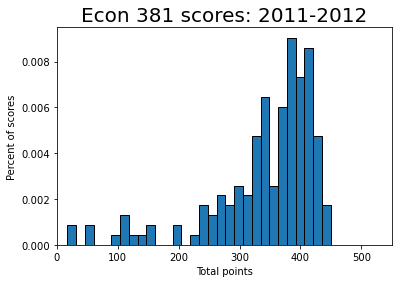

In [6]:
num_bins = 30
count, bins, ignored = plt.hist(pts, num_bins, density=True,
                                edgecolor='k')
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel(r'Total points')
plt.ylabel(r'Percent of scores')
plt.xlim([0, 550])